In [24]:
# 1. Data Ingestion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

# Load Dataset
df=pd.read_csv("/Users/rahul_anand/Downloads/marketing_campaign_dataset.csv")
print(df.head())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost  ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00 6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00 5.61     New York    German   
2      YouTube             0.07       $10,200.00 7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00 5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00 6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score     Custo

In [25]:
df.shape

(200000, 16)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [27]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,"200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00"
mean,"100,000.50",0.08,5.00,549.77,"5,507.30",5.49
std,"57,735.17",0.04,1.73,260.02,"2,596.86",2.87
min,1.00,0.01,2.00,100.00,"1,000.00",1.00
25%,"50,000.75",0.05,3.50,325.00,"3,266.00",3.00
50%,"100,000.50",0.08,5.01,550.00,"5,517.50",5.00
75%,"150,000.25",0.12,6.51,775.00,"7,753.00",8.00
max,"200,000.00",0.15,8.00,"1,000.00","10,000.00",10.00


In [28]:
# 2. Data Cleaning and Preparation

# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Convert date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Clean acquisition_cost column (remove $ and commas)
df["acquisition_cost"] = (
    df["acquisition_cost"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Ensure numeric columns
numeric_cols = [
    "clicks", "impressions", "conversion_rate",
    "roi", "engagement_score"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove invalid rows
df = df[(df["impressions"] > 0) & (df["clicks"] >= 0)]

In [29]:
print(df.head())

   campaign_id              company campaign_type target_audience duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  channel_used  conversion_rate  acquisition_cost  roi     location  language  \
0   Google Ads             0.04         16,174.00 6.29      Chicago   Spanish   
1   Google Ads             0.12         11,566.00 5.61     New York    German   
2      YouTube             0.07         10,200.00 7.18  Los Angeles    French   
3      YouTube             0.11         12,724.00 5.55        Miami  Mandarin   
4      YouTube             0.05         16,452.00 6.50  Los Angeles  Mandarin   

   clicks  impressions  engagement_score    

In [30]:
# Feature Engineering


# Click-through rate
df["ctr"] = df["clicks"] / df["impressions"]

# Estimated conversions
df["conversions"] = (df["clicks"] * df["conversion_rate"]).round()

# Spend & Revenue
df["spend"] = df["acquisition_cost"]
df["revenue"] = df["roi"] * df["spend"]

# Cost metrics
df["cpc"] = df["spend"] / df["clicks"]
df["cpa"] = df["spend"] / df["conversions"]

print(df.head())

   campaign_id              company campaign_type target_audience duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  channel_used  conversion_rate  acquisition_cost  roi     location  ...  \
0   Google Ads             0.04         16,174.00 6.29      Chicago  ...   
1   Google Ads             0.12         11,566.00 5.61     New York  ...   
2      YouTube             0.07         10,200.00 7.18  Los Angeles  ...   
3      YouTube             0.11         12,724.00 5.55        Miami  ...   
4      YouTube             0.05         16,452.00 6.50  Los Angeles  ...   

  impressions  engagement_score     customer_segment       date  ctr  \
0 

In [31]:
# 3. Exploratory Data Analysis (EDA)

# Overall KPIs
total_spend = df["spend"].sum()
total_revenue = df["revenue"].sum()
total_conversions = df["conversions"].sum()
avg_ctr = df["ctr"].mean()
avg_cpa = df["cpa"].mean()

print(f"Total Spend: ${total_spend:,.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Conversions: {int(total_conversions)}")
print(f"Average CTR: {avg_ctr:.2%}")
print(f"Average CPA: ${avg_cpa:,.2f}")


# Channel-level performance
channel_summary = (
    df.groupby("channel_used")
      .agg({
          "impressions": "sum",
          "clicks": "sum",
          "conversions": "sum",
          "spend": "sum",
          "revenue": "sum"
      })
      .reset_index()
)

channel_summary["ctr"] = channel_summary["clicks"] / channel_summary["impressions"]
channel_summary["cpa"] = channel_summary["spend"] / channel_summary["conversions"]

channel_summary.sort_values("revenue", ascending=False)

Total Spend: $2,500,878,608.00
Total Revenue: $12,517,388,674.24
Total Conversions: 8804727
Average CTR: 14.04%
Average CPA: $640.07


,channel_used,impressions,clicks,conversions,spend,revenue,ctr,cpa
0,Email,184801107,18493963,"1,485,425.00","420,874,104.00","2,103,770,103.68",0.10,283.34
2,Google Ads,185006879,18340807,"1,468,717.00","418,912,314.00","2,097,811,310.98",0.10,285.22
4,Website,183806353,18414628,"1,477,660.00","416,593,500.00","2,087,558,955.56",0.10,281.93
5,YouTube,183448082,18350407,"1,463,649.00","416,778,582.00","2,084,326,307.91",0.10,284.75
3,Instagram,183738455,18316654,"1,462,938.00","417,124,850.00","2,079,976,528.70",0.10,285.13
1,Facebook,180659428,18037947,"1,446,338.00","410,595,258.00","2,063,945,467.41",0.10,283.89


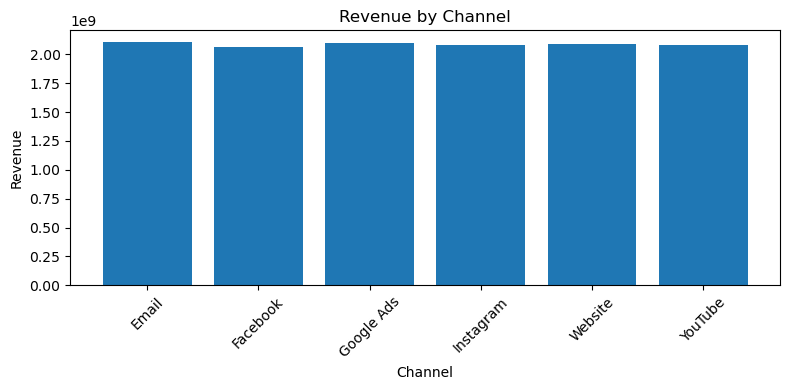

In [32]:
# 4. Basic Visualizations

# 1. Revenue by Channel
plt.figure(figsize=(8,4))
plt.bar(channel_summary["channel_used"], channel_summary["revenue"])
plt.title("Revenue by Channel")
plt.xlabel("Channel")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

- All major channels — Email, Facebook, Google Ads, Instagram, Website, and YouTube — generate very similar revenue levels, each around the $2.0–2.1B range.
- No single channel clearly dominates in terms of total revenue contribution.
- The revenue distribution is balanced across channels, indicating a diversified marketing mix rather than over-reliance on one source.

**What this means from a business perspective:**

- The company is not dependent on a single channel for revenue, which reduces risk.
- Since revenue is similar across channels, revenue alone is not sufficient to judge performance.
- To make optimization decisions, we need to compare efficiency metrics such as:
    - Cost per Acquisition (CPA)
    - ROI / ROAS
    - Conversion Rate (CVR)

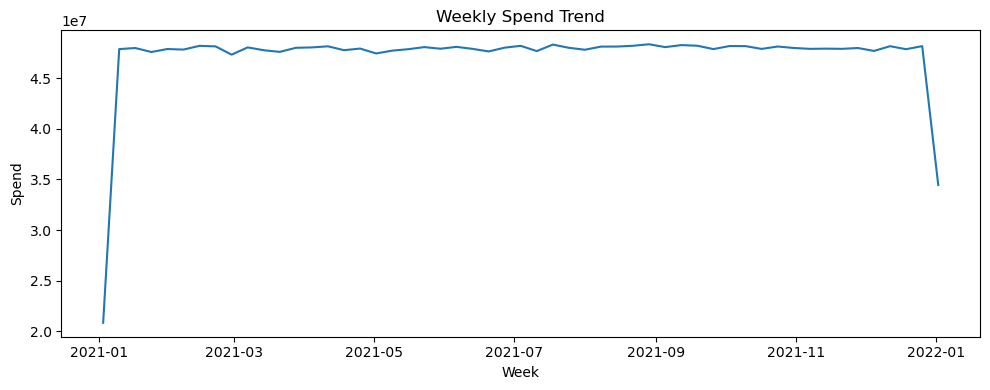

In [16]:
# 2. Weekly Spend Trend
weekly = (
    df.set_index("date")
      .resample("W")
      .agg({"spend": "sum", "conversions": "sum"})
)

plt.figure(figsize=(10,4))
plt.plot(weekly.index, weekly["spend"])
plt.title("Weekly Spend Trend")
plt.xlabel("Week")
plt.ylabel("Spend")
plt.tight_layout()
plt.show()

**Observation**

**Sharp increase at the beginning:**

- Spend jumps significantly in the first few weeks. This likely indicates:
- Campaign ramp-up or launch phase
- Budget allocation being fully activated after an initial test period

**Stable spend for most of the year:**

- After the initial spike, weekly spend remains remarkably consistent (roughly flat throughout the year).
- This suggests a controlled and planned budget strategy
- No major spikes or drops, indicating limited reactive changes

**Drop at the end of the period:**

- The sharp decline in the final week is likely due to:
- Partial data for the last week
- Campaign wind-down or reporting cut-off

**Business interpretation**

- The company follows a steady “always-on” marketing approach, rather than heavy seasonal or burst campaigns.
- Budget stability implies:
    -Predictable performance tracking
    -Easier attribution and ROI analysis
- However, stable spend does not guarantee efficiency — spend should be evaluated alongside conversions and CPA.

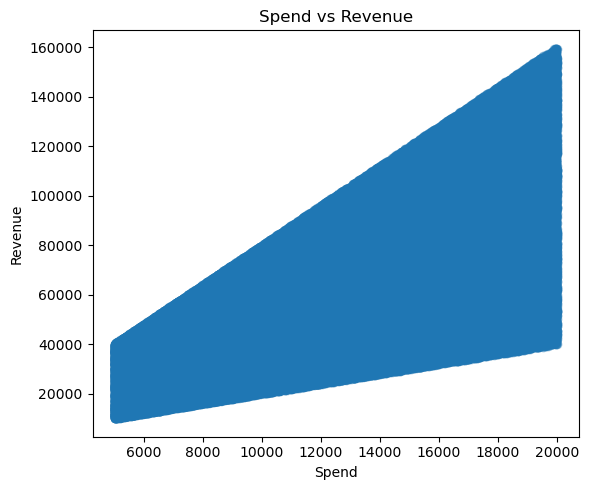

In [17]:
# 3. Spend vs Revenue
plt.figure(figsize=(6,5))
plt.scatter(df["spend"], df["revenue"], alpha=0.4)
plt.title("Spend vs Revenue")
plt.xlabel("Spend")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

**What we observe**

- There is a strong positive relationship between spend and revenue — as spend increases, revenue generally increases.
- However, the points form a wide triangular spread, not a tight line.
    For the same level of spend, revenue can vary significantly.
    This indicates inconsistent campaign efficiency.
- The upper boundary represents high-performing campaigns (strong ROI).
- The lower boundary represents low-performing campaigns (poor ROI).

**Why the triangular shape appears**

- Revenue is calculated as ROI × Spend, and ROI varies across campaigns.
- At higher spend levels, revenue dispersion increases because:
    - Some campaigns scale efficiently
    - Others experience diminishing returns

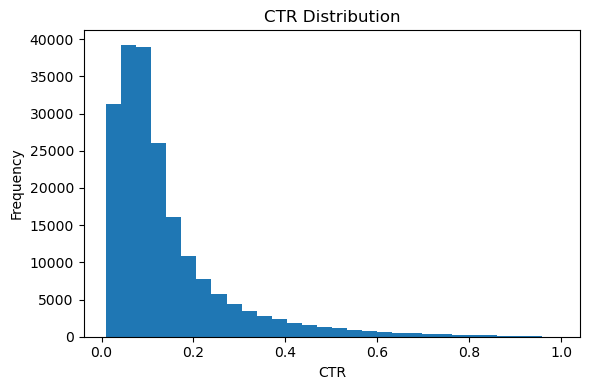

In [18]:
# 4. CTR Distribution
plt.figure(figsize=(6,4))
plt.hist(df["ctr"].dropna(), bins=30)
plt.title("CTR Distribution")
plt.xlabel("CTR")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**What we observe**

- The distribution is right-skewed (long tail to the right).
- Most campaigns have a low CTR, concentrated roughly between 0% and 15%.
- A small number of campaigns achieve very high CTRs (up to ~100%), but these are outliers rather than the norm.
- As CTR increases, the frequency of campaigns drops sharply.

**What this means**

- The majority of campaigns generate limited engagement, which is common in large-scale marketing programs.
- A small subset of high-CTR campaigns is likely driving a disproportionate share of clicks.
- The wide spread indicates inconsistent creative effectiveness, audience targeting, or channel fit.

**Business interpretation**

- Average CTR alone can be misleading because it is influenced by a few high-performing campaigns.
- There is clear opportunity to lift overall performance by improving low-CTR campaigns, rather than relying on outliers.

**Overall Key Insights:**

1. Overall campaigns are profitable, generating significantly higher revenue than total spend.
2. Revenue is distributed across multiple channels, indicating diversified acquisition strategy.
3. Some high-spend campaigns do not proportionally increase revenue, suggesting diminishing returns.
4. Average CTR shows a long tail distribution — many campaigns underperform the mean.
5. High CPA campaigns should be reviewed for targeting, creative, or landing page issues.

**Recommendations:**

- Reallocate budget toward channels with lower CPA and higher revenue.
- Pause or optimize campaigns with high spend but low conversions.
- Run A/B tests on low-CTR creatives to improve engagement.